In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2 as cv
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.keras import layers, models , Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dropout , Dense , Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator as dag
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix

2025-06-08 16:39:19.245208: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749400759.551732      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749400759.642905      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
path = r"/kaggle/input/covid19-xray-dataset-train-test-sets"

In [3]:
print(os.listdir(path))

['xray_dataset_covid19']


In [4]:
path = os.path.join(path , 'xray_dataset_covid19')

In [5]:
print(os.listdir(path))

['test', 'train']


In [6]:
df_train =(os.path.join(path, "train"))
df_test =(os.path.join(path, "test"))

In [7]:
os.listdir(df_train)

['PNEUMONIA', 'NORMAL']

In [8]:
os.listdir(df_test)

['PNEUMONIA', 'NORMAL']

test
---> PNEUMONIA
------> SARS-10.1148rg.242035193-g04mr34g04b-Fig4b-day12.jpeg


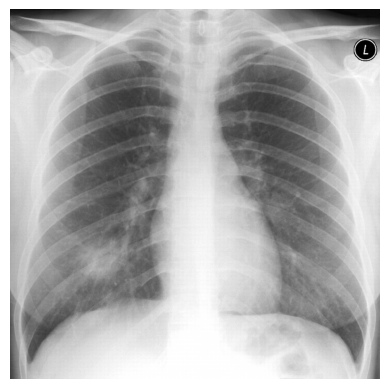

------> ryct.2020200034.fig5-day4.jpeg


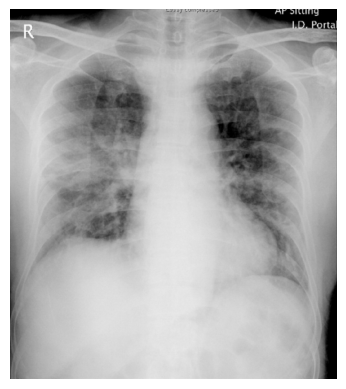

------> SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5.jpeg


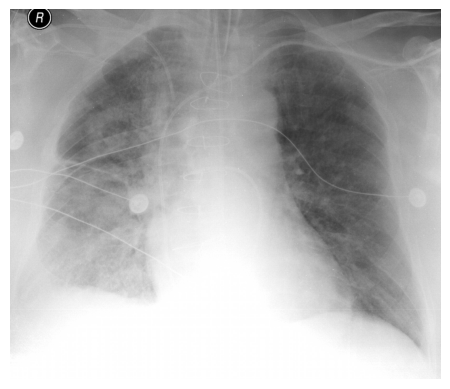

------> ryct.2020200034.fig5-day0.jpeg


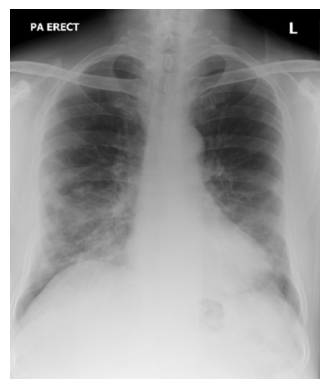

------> SARS-10.1148rg.242035193-g04mr34g09a-Fig9a-day17.jpeg


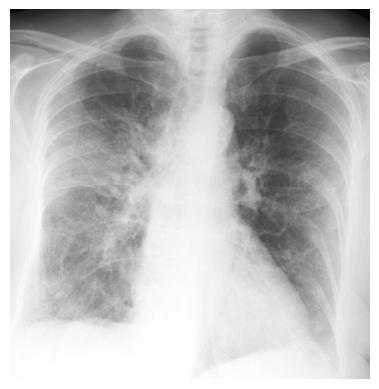

------> ryct.2020200034.fig2.jpeg


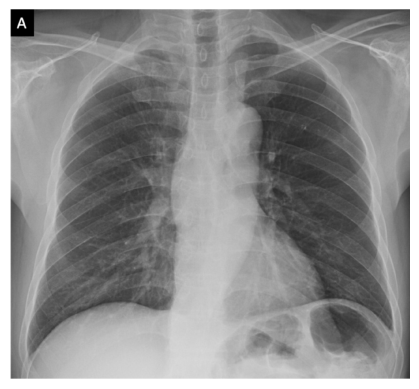

------> streptococcus-pneumoniae-pneumonia-temporal-evolution-1-day3.jpg


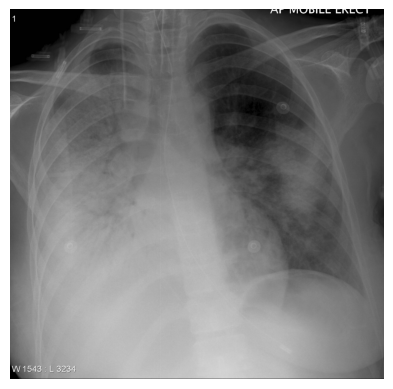

------> SARS-10.1148rg.242035193-g04mr34g05x-Fig5-day9.jpeg


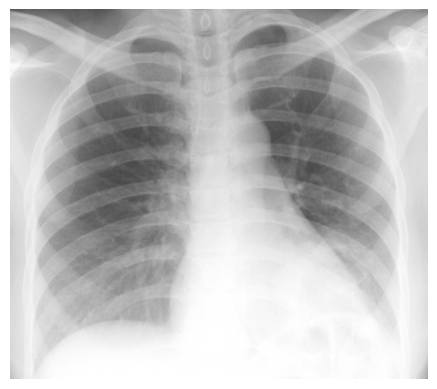

------> streptococcus-pneumoniae-pneumonia-temporal-evolution-1-day2.jpg


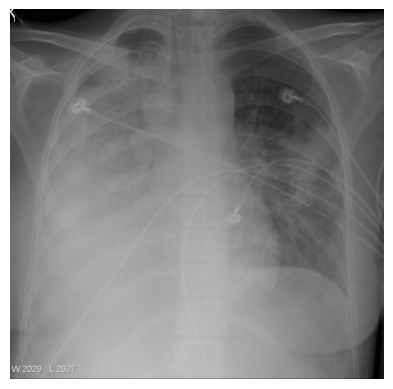

------> SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0.jpeg


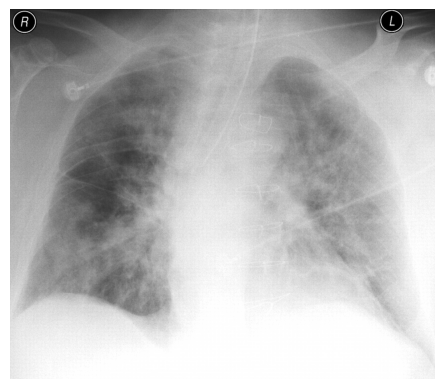

------> streptococcus-pneumoniae-pneumonia-1.jpg


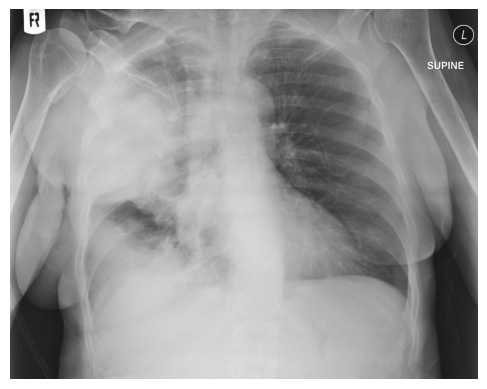

------> ryct.2020200034.fig5-day7.jpeg


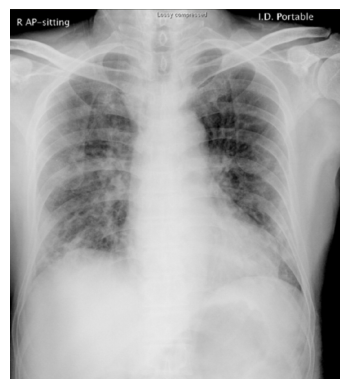

------> SARS-10.1148rg.242035193-g04mr34g07a-Fig7a-day5.jpeg


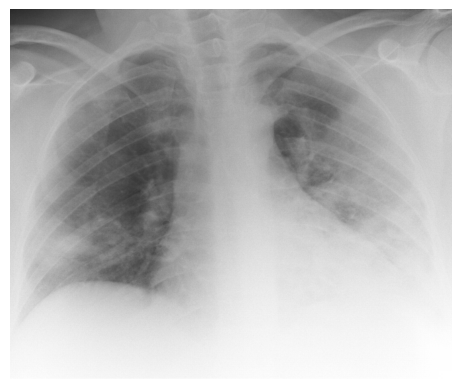

------> SARS-10.1148rg.242035193-g04mr34g0-Fig8c-day10.jpeg


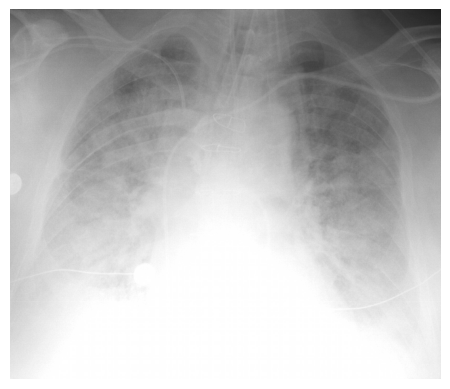

------> SARS-10.1148rg.242035193-g04mr34g04a-Fig4a-day7.jpeg


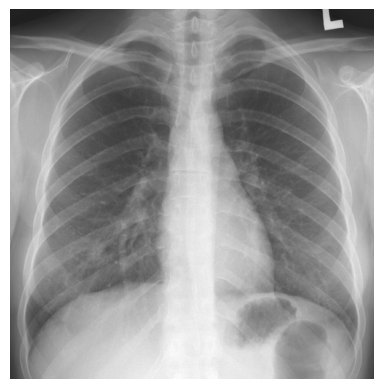

------> streptococcus-pneumoniae-pneumonia-temporal-evolution-1-day0.jpg


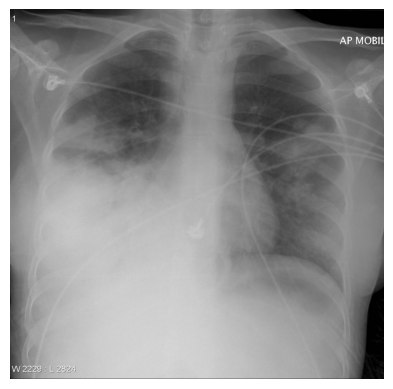

------> SARS-10.1148rg.242035193-g04mr34g07b-Fig7b-day12.jpeg


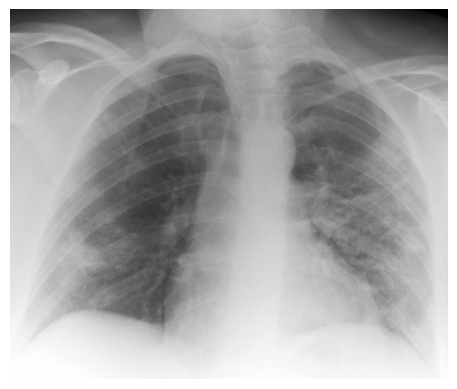

------> streptococcus-pneumoniae-pneumonia-temporal-evolution-1-day1.jpg


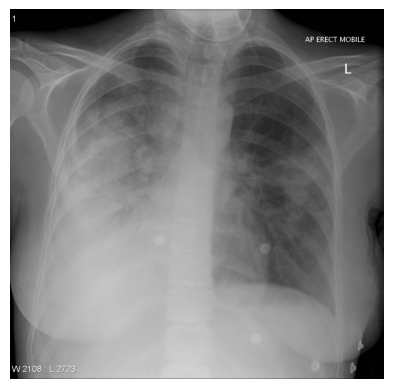

------> SARS-10.1148rg.242035193-g04mr34g09c-Fig9c-day27.jpeg


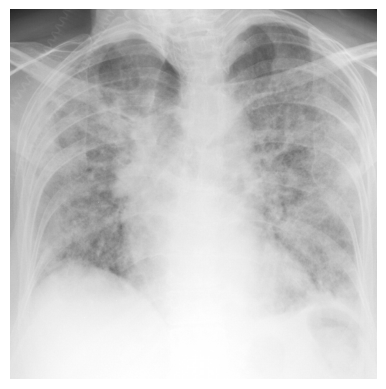

------> SARS-10.1148rg.242035193-g04mr34g09b-Fig9b-day19.jpeg


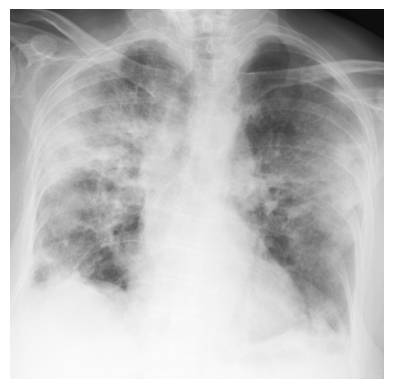

---> NORMAL
------> NORMAL2-IM-0139-0001.jpeg


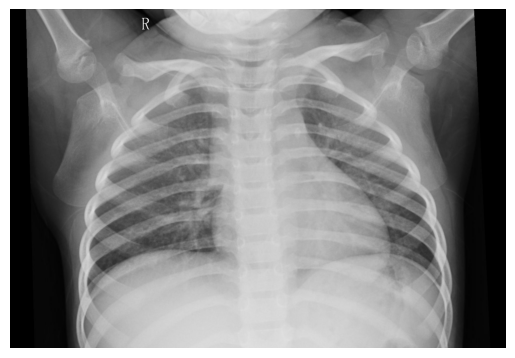

------> NORMAL2-IM-0073-0001.jpeg


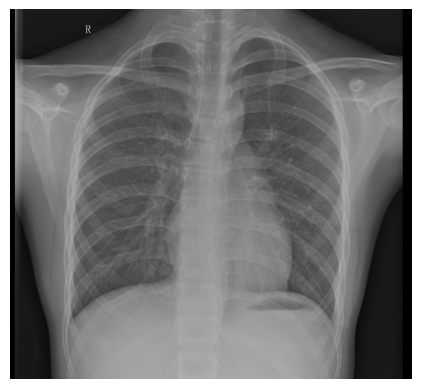

------> NORMAL2-IM-0092-0001.jpeg


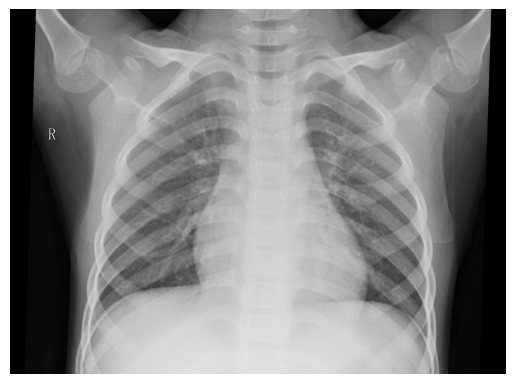

------> NORMAL2-IM-0120-0001.jpeg


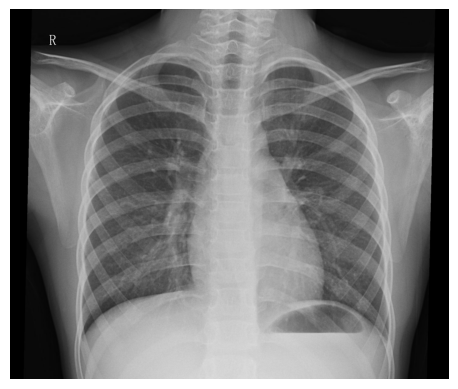

------> NORMAL2-IM-0035-0001.jpeg


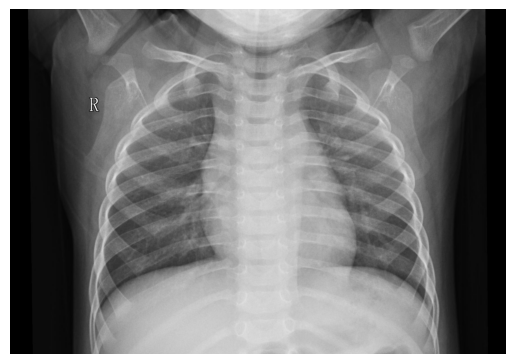

------> NORMAL2-IM-0052-0001.jpeg


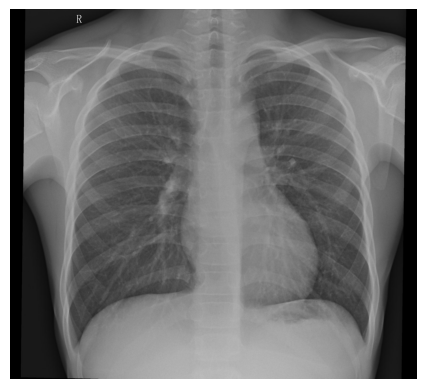

------> NORMAL2-IM-0111-0001.jpeg


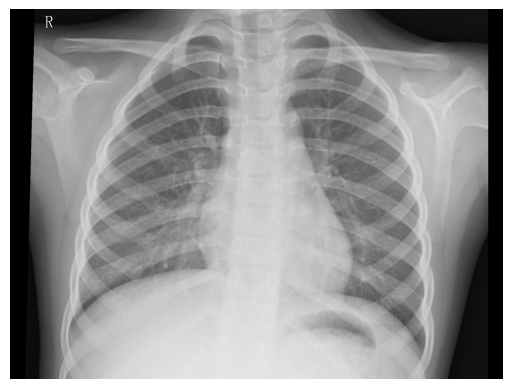

------> NORMAL2-IM-0112-0001.jpeg


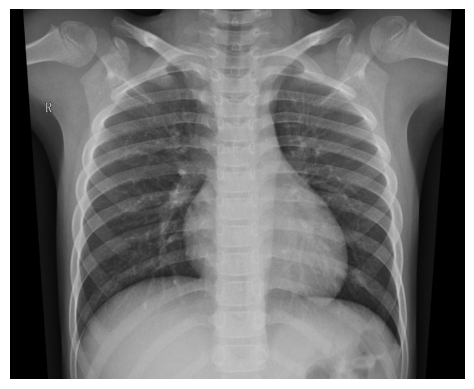

------> NORMAL2-IM-0132-0001.jpeg


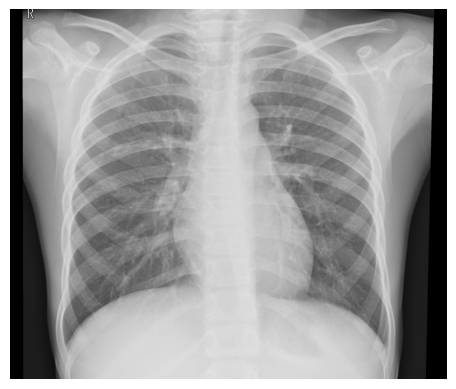

------> NORMAL2-IM-0171-0001.jpeg


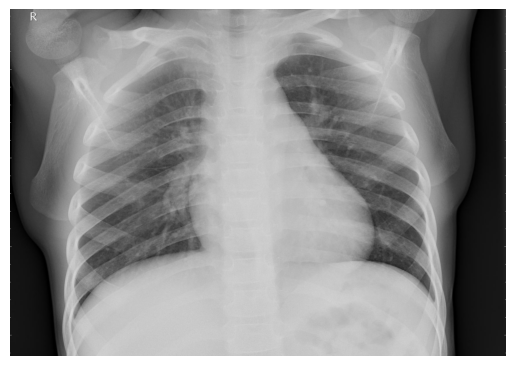

------> NORMAL2-IM-0058-0001.jpeg


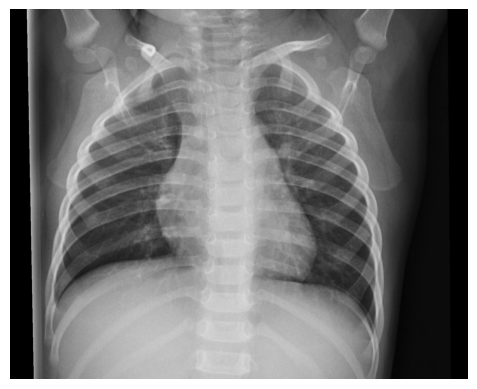

------> NORMAL2-IM-0145-0001.jpeg


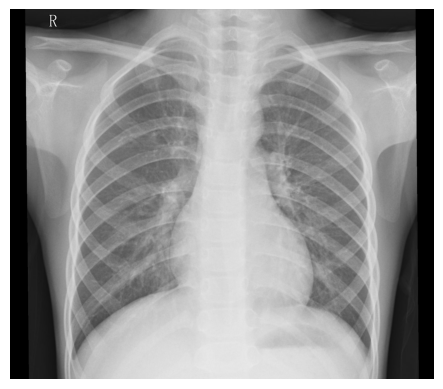

------> NORMAL2-IM-0059-0001.jpeg


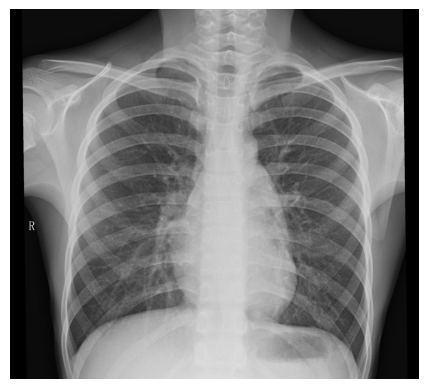

------> NORMAL2-IM-0105-0001.jpeg


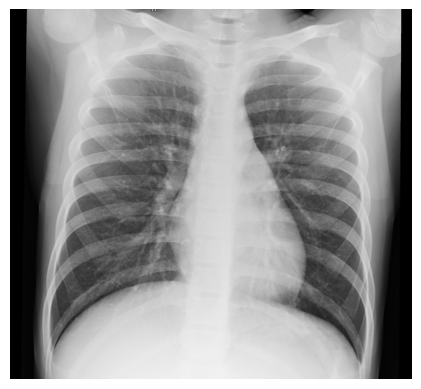

------> NORMAL2-IM-0131-0001.jpeg


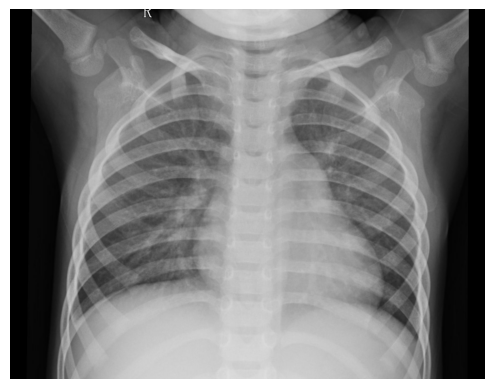

------> NORMAL2-IM-0110-0001.jpeg


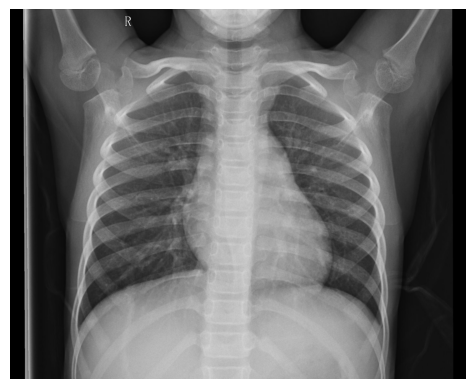

------> NORMAL2-IM-0117-0001.jpeg


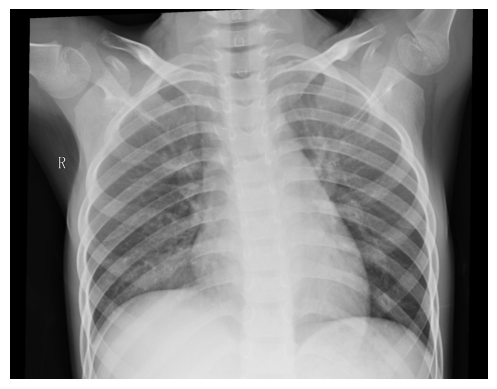

------> NORMAL2-IM-0130-0001.jpeg


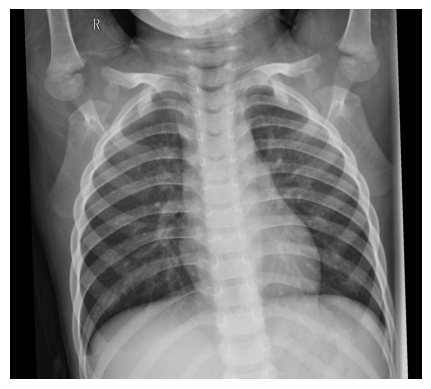

------> NORMAL2-IM-0072-0001.jpeg


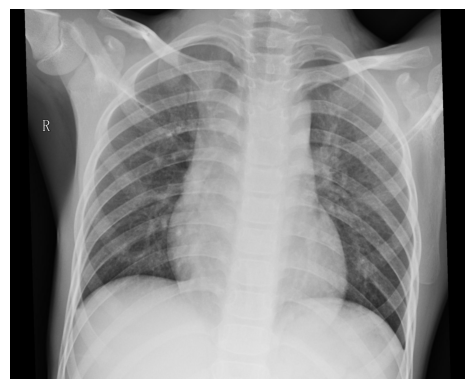

------> NORMAL2-IM-0123-0001.jpeg


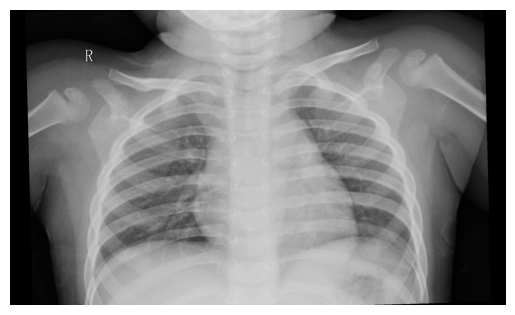

In [9]:
for fol in os.listdir(path):
    print(fol)
    for fol2 in os.listdir(os.path.join(path,fol)):
        print("--->",fol2)
        for fol3 in os.listdir(os.path.join(path,fol,fol2)):
            print("------>",fol3)
            img = os.path.join(path,fol,fol2,fol3)
            img = cv.imread(img)
            img = cv.cvtColor(img , cv.COLOR_BGR2RGB)
            
            plt.imshow(img)
            plt.axis('off')
            plt.show()
    break 

In [10]:
h,w=224,224
b_size=64

In [11]:
data_datagen = dag(rescale = 1./255)
train_generation = data_datagen.flow_from_directory(
    df_train,
    target_size = (h,w),
    batch_size = b_size,
    class_mode = 'binary',
    color_mode = 'grayscale'
)

test_generation = data_datagen.flow_from_directory(
    df_test,
    target_size = (h,w),
    batch_size = b_size,
    class_mode = 'binary',
    color_mode = 'grayscale',
    shuffle = False
)

Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [12]:
train_generation.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [13]:
test_generation.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [14]:
model = Sequential([
    Conv2D(32 , (3,3) , activation = 'relu' , input_shape = (h , w , 1)),
    MaxPooling2D((2,2)),
    
    Conv2D(64 , (3,3) , activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(.5),
    
    Conv2D(128 , (3,3) , activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Conv2D(256 , (3,3) ,activation = 'relu'),
    MaxPooling2D((2,2)),
    Dropout(.5),
    
    Flatten(),
    Dense(128 , activation = 'relu'),
    Dense(1 , activation = 'sigmoid')
])

2025-06-08 16:39:53.429055: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [15]:
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,718,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,106,689 (19.48 MB)

 Trainable params: 5,106,689 (19.48 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
epochs = 15
earlystop = EarlyStopping(patience = 5)

history = model.fit(
    train_generation ,
    epochs = epochs ,
    batch_size = b_size,
    validation_data = test_generation,
    callbacks = [earlystop]
)

Epoch 1/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step - accuracy: 0.4854 - loss: 0.9979 - val_accuracy: 0.5000 - val_loss: 0.6952
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.5273 - loss: 0.7010 - val_accuracy: 0.5000 - val_loss: 0.6920
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 0.4753 - loss: 0.6927 - val_accuracy: 0.5000 - val_loss: 0.6880
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 0.5350 - loss: 0.6785 - val_accuracy: 0.7000 - val_loss: 0.6764
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 6s/step - accuracy: 0.7675 - loss: 0.6431 - val_accuracy: 0.9750 - val_loss: 0.6441
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.8621 - loss: 0.5771 - val_accuracy: 0.9750 - val_loss: 0.5249
Epoch 7/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 0.8214 - loss: 0.4949 - val_accuracy: 0.9500 - val_loss: 0.3682
Epoch 8/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 4s/step - accuracy: 0.8855 - loss: 0.3292 - val_accuracy: 0.9750 - val_loss: 0.3136
Epoch 9/

In [17]:
loss , accuracy = model.evaluate(test_generation)
print(f"The Loss is : {loss}")
print(f"The accuracy is : {accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.9750 - loss: 0.1344
The Loss is : 0.1343502253293991
The accuracy is : 0.9750000238418579


In [18]:
model_pred = model.predict(test_generation)
model_pred = (model_pred > 0.5)  

true_label = test_generation.classes

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [19]:
confusion_matrix(true_label , model_pred)

array([[20,  0],
       [ 1, 19]])

In [20]:
model.save('COVID-19 Xray Detection.h5')

In [21]:
image_path = r"/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5.jpeg"
image_pil = Image.open(image_path).convert("RGB")

In [22]:
image_np = tf.keras.utils.img_to_array(image_pil)

img_gray = cv.cvtColor(image_np, cv.COLOR_RGB2GRAY)

img_resized = cv.resize(img_gray, (224, 224))

img_norm = img_resized / 255.0

img_input = img_norm.reshape(1, 224, 224, 1)


In [23]:
predict = model.predict(img_input)[0][0]
predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


0.99576527

In [24]:
if predict >= .5:
    pred = "PNEUMONIA"
        
    print('Case detected is" **' + pred +'**')
    print('With accuracy of **{:.2f}%**'.format(100 * predict))
else:
    pred = "NORMAL"
    print('Case detected is" **' + pred +'**')
    print('With accuracy of **{:.2f}%**'.format(100 * (1 - predict)))

Case detected is" **PNEUMONIA**
With accuracy of **99.58%**
